# Project analysis

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import git

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

sys.path.append(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
print(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

from gitlytic import settings
from gitlytic.dataloader import load_project_commit_df
from gitlytic.project import get_project_output_dir_by_name, get_project_path

/home/skupsala/code/gitlytic


Set your project and repo config here

In [2]:
PROJECT_NAME = 'datascience'

Load repo TSV file

In [3]:
df = load_project_commit_df(get_project_path(PROJECT_NAME))

Loading commits dataframe for datascience


In [4]:
df.set_index(['repo_name', 'author_email', 'commit_hash'], drop=False, inplace=True)
df.tail()

repo_name  \
repo_name author_email commit_hash                                          
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e  notebook   
                       1828f321167347267e2b0aec096488b51e46f3b3  notebook   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8  notebook   
                       e7c9387f269d3bb72d86fff29477f09177616d89  notebook   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda  notebook   

                                                                                              commit_hash  \
repo_name author_email commit_hash                                                                          
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e  e03df277e6dae7901c83d9d0ba7fa18940b1d06e   
                       1828f321167347267e2b0aec096488b51e46f3b3  1828f321167347267e2b0aec096488b51e46f3b3   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8  614fa9e90e1eea693c59537fb5b45d173efe28e8   
                       e7c9387f269d3bb72d86fff29477f09177616d89  e7c9387f269d3bb72d86fff29477f09177616d89   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda  ad18848364e5e4073f80b03c64b6fa4bc1dcfbda   

                                                                 author_name  \
repo_name author_email commit_hash                                             
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e  vivainio <>   
                       1828f321167347267e2b0aec096488b51e46f3b3  vivainio <>   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8    fperez <>   
                       e7c9387f269d3bb72d86fff29477f09177616d89    fperez <>   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda    fperez <>   

                                                                author_email  \
repo_name author_email commit_hash                                             
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e          NaN   
                       1828f321167347267e2b0aec096488b51e46f3b3          NaN   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8          NaN   
                       e7c9387f269d3bb72d86fff29477f09177616d89          NaN   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda          NaN   

                                                                        author_date  \
repo_name author_email commit_hash                                                    
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e 2006-02-03 07:35:45   
                       1828f321167347267e2b0aec096488b51e46f3b3 2006-02-01 19:29:22   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8 2005-12-25 00:57:24   
                       e7c9387f269d3bb72d86fff29477f09177616d89 2005-12-01 18:14:21   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda 2005-07-06 17:52:32   

                                                                committer_name  \
repo_name author_email commit_hash                                               
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e    vivainio <>   
                       1828f321167347267e2b0aec096488b51e46f3b3    vivainio <>   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8      fperez <>   
                       e7c9387f269d3bb72d86fff29477f09177616d89      fperez <>   
                       ad18848364e5e4073f80b03c64b6fa4bc1dcfbda      fperez <>   

                                                                committer_email  \
repo_name author_email commit_hash                                                
notebook  NaN          e03df277e6dae7901c83d9d0ba7fa18940b1d06e             NaN   
                       1828f321167347267e2b0aec096488b51e46f3b3             NaN   
                       614fa9e90e1eea693c59537fb5b45d173efe28e8             NaN   
                       e7c9387f269d3bb

## Project overview
TODO
- TOP 10 contributors (3months, 2weeks)
  * How many commits
  * Percentage of commits
- Commmits per week chart over X weeks
- Commit message length distribution over all commits
- LOC over time
- Author count over time
- New authors per week for last X weeks
- Files over time
- Directories over time
- Fix commits over time

#### Commit and author count

In [5]:
total_commit_count = len(df)
print("Commit count: {}".format(total_commit_count))
total_author_count = df['author_email'].nunique()
print("Author count: {}".format(total_author_count))

Commit count: 110377
Author count: 4317


In [6]:
def get_top_contributors(df, top_count=10):
    commit_count = len(df)
    top_committers = df.groupby('author_email').size().sort_values(ascending=False)[:top_count].to_frame(name='commit_count')
    top_committers['percentage_of_commits'] = (top_committers['commit_count'] / commit_count) * 100.0
    return top_committers

In [7]:
repos_by_hour = {}
for repo_name, repo_df in df.groupby(level=0):
    print()
    print('-----------------------------------------------------------')
    print('Repo: {}'.format(repo_name))
    print('Commits: {}'.format(len(repo_df)))
    print('Authors: {}'.format(repo_df['author_email'].nunique()))
    oldest_commit = repo_df.iloc[-1]
    age_delta = datetime.now() - oldest_commit.author_date.to_pydatetime()
    age_delta_years = age_delta.days // 366 # This is not exact - precise enough for this purpose
    print('Age: {years} year(s) and {days} day(s)'.format(years=age_delta_years, days=(age_delta.days-age_delta_years*365)))
    print('First commit was written {} by {}'.format(oldest_commit.author_date.to_pydatetime(), oldest_commit.author_name))
    print('For nostalgy, here it is:')
    print(oldest_commit.subject)
    print()
    print('Since that a lot have happened...')
    TOP_COUNT = 5
    print('Here you see top {} contributors portion of the contributions'.format(TOP_COUNT))
    repo_top_contributors = get_top_contributors(repo_df, top_count=TOP_COUNT)
    print(repo_top_contributors.sum())
    print(repo_top_contributors)
    print()
    print('Last three months top {} contributors'.format(TOP_COUNT))
    last_three_months_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=3 * 30))]
    last_three_months_top_contributors = get_top_contributors(last_three_months_commits, top_count=TOP_COUNT)
    print(last_three_months_top_contributors)
    print()
    print('Last two weeks top {} contributors'.format(TOP_COUNT))
    last_two_weeks_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=14))]
    last_two_weeks_top_contributors = get_top_contributors(last_two_weeks_commits, top_count=TOP_COUNT)
    print(last_two_weeks_top_contributors)
    author_date_index = pd.DatetimeIndex(repo_df['author_date'])
    print(author_date_index.hour)
    repos_by_hour[repo_name] = repo_df.groupby(author_date_index.hour)['author_email'].count()
    


-----------------------------------------------------------
Repo: matplotlib
Commits: 23714
Authors: 819
Age: 14 year(s) and 239 day(s)
First commit was written 2003-05-12 15:20:38 by John Hunter
For nostalgy, here it is:
The new matplotlib hierarchy

Since that a lot have happened...
Here you see top 5 contributors portion of the contributions
commit_count             11906.000000
percentage_of_commits       50.206629
dtype: float64
                           commit_count  percentage_of_commits
author_email                                                  
mdboom@gmail.com                   3876              16.344775
tcaswell@gmail.com                 3509              14.797166
jdh2358@gmail.com                  2145               9.045290
efiring@hawaii.edu                 1689               7.122375
nelle.varoquaux@gmail.com           687               2.897023

Last three months top 5 contributors
                           commit_count  percentage_of_commits
author_email       

/home/skupsala/code/gitlytic/gl/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 'author_email' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


### Commits over time

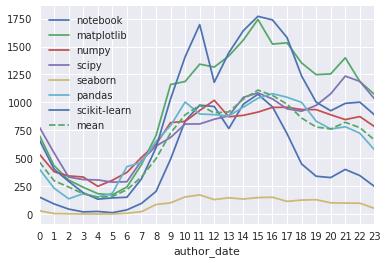

In [8]:
for repo_name, by_hour in repos_by_hour.items():
    ax = by_hour.plot(xticks=np.arange(24), label=repo_name)
    ax.legend()
mean_by_hour_df = pd.concat(list(repos_by_hour.values()), axis=1)
ax = mean_by_hour_df.mean(axis=1).plot(xticks=np.arange(24), label='mean', style='--')
ax.legend()

### Subject line distributions

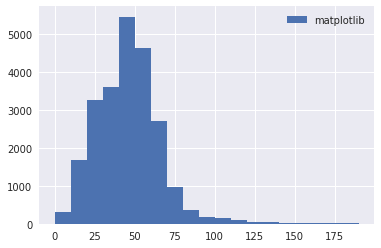

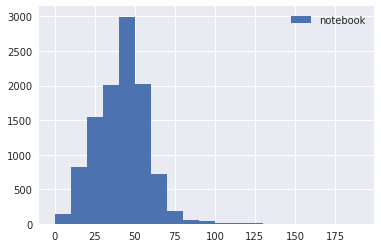

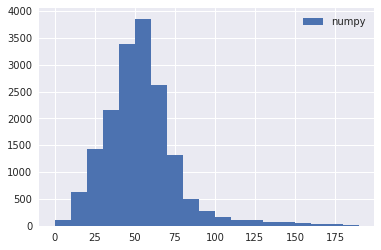

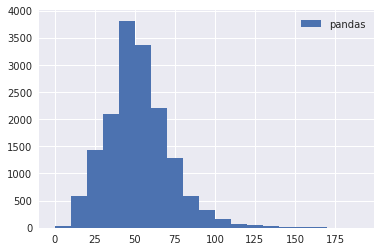

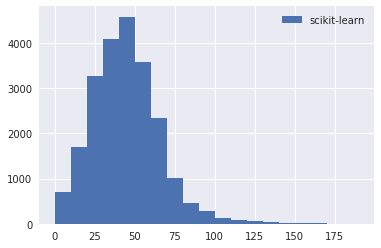

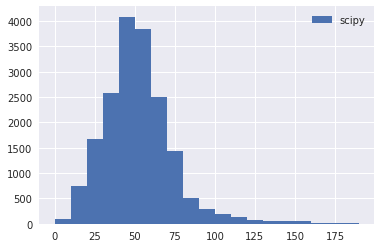

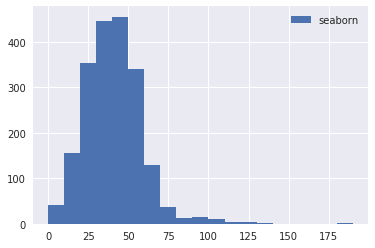

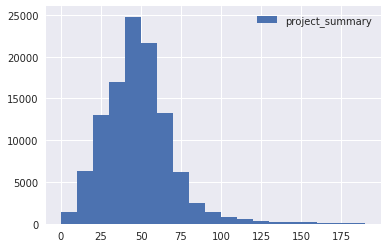

In [9]:
for repo_name, repo_df in df.groupby(level=0):
    plt.figure()
    s = pd.Series(repo_df['subject'].str.len().values)
    ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label=repo_name)
    ax.legend()

plt.figure()
s = pd.Series(df['subject'].str.len().values)
ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label='project_summary')
ax.legend()